In [1]:
import pandas as pd
import numpy as np
import warnings
from tqdm import tqdm


import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import boxcox
warnings.filterwarnings('ignore')

RSEED=42

sns.set_context('talk')
plt.style.use(['dark_background'])
#plt.rcParams['image.cmap'] = "orangered"
plt.rcParams.update({'font.sans-serif':'Helvetica'})

In [2]:
data =  pd.read_csv("./data/data_prep_clf.csv", index_col=[0])

In [3]:
data.columns

Index(['location', 'target', 'max_temp', 'min_temp', 'mean_temp', 'std_temp',
       'var_temp', 'median_temp', 'ptp_temp', 'max_precip', 'min_precip',
       'mean_precip', 'std_precip', 'var_precip', 'median_precip',
       'ptp_precip', 'max_rel_humidity', 'min_rel_humidity',
       'mean_rel_humidity', 'std_rel_humidity', 'var_rel_humidity',
       'median_rel_humidity', 'ptp_rel_humidity', 'max_wind_dir',
       'min_wind_dir', 'mean_wind_dir', 'std_wind_dir', 'var_wind_dir',
       'median_wind_dir', 'ptp_wind_dir', 'max_wind_spd', 'min_wind_spd',
       'mean_wind_spd', 'std_wind_spd', 'var_wind_spd', 'median_wind_spd',
       'ptp_wind_spd', 'max_atmos_press', 'min_atmos_press',
       'mean_atmos_press', 'std_atmos_press', 'var_atmos_press',
       'median_atmos_press', 'ptp_atmos_press', 'Bi_airquality',
       'trafic_airquality', '6fold_airquality'],
      dtype='object')

In [73]:
data_b=data.drop(["target",'trafic_airquality', '6fold_airquality'],axis=1)

In [5]:
data_b.head()

,location,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,min_precip,...,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press,Bi_airquality
0,2,27.208333,19.275000,22.299527,2.594011,6.728895,21.358333,7.933333,0.000,0.0,...,0.666250,1.355000,87.871667,87.614167,87.752434,0.070374,0.004952,87.762083,0.257500,bad
1,3,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,0.561,0.0,...,0.744167,2.760833,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333,bad
2,0,31.841667,18.458333,24.112317,3.776377,14.261020,23.304167,13.383333,7.804,0.0,...,0.942500,2.420000,88.813333,87.982500,88.420931,0.179481,0.032213,88.425000,0.830833,good
3,0,27.491667,16.941667,20.845273,3.080140,9.487259,19.541667,10.550000,25.787,0.0,...,1.388333,2.469167,88.685000,87.965000,88.376915,0.161758,0.026166,88.400000,0.720000,bad
4,0,28.750000,17.525000,21.870732,3.286870,10.803515,20.950000,11.225000,0.136,0.0,...,0.542917,1.796667,88.719167,88.268333,88.538104,0.118369,0.014011,88.552500,0.450833,bad


In [74]:
y=data_b["Bi_airquality"]
X= data_b.drop(["Bi_airquality"], axis =1)

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=RSEED)

## Scaling

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [9]:
X.columns

Index(['location', 'max_temp', 'min_temp', 'mean_temp', 'std_temp', 'var_temp',
       'median_temp', 'ptp_temp', 'max_precip', 'min_precip', 'mean_precip',
       'std_precip', 'var_precip', 'median_precip', 'ptp_precip',
       'max_rel_humidity', 'min_rel_humidity', 'mean_rel_humidity',
       'std_rel_humidity', 'var_rel_humidity', 'median_rel_humidity',
       'ptp_rel_humidity', 'max_wind_dir', 'min_wind_dir', 'mean_wind_dir',
       'std_wind_dir', 'var_wind_dir', 'median_wind_dir', 'ptp_wind_dir',
       'max_wind_spd', 'min_wind_spd', 'mean_wind_spd', 'std_wind_spd',
       'var_wind_spd', 'median_wind_spd', 'ptp_wind_spd', 'max_atmos_press',
       'min_atmos_press', 'mean_atmos_press', 'std_atmos_press',
       'var_atmos_press', 'median_atmos_press', 'ptp_atmos_press'],
      dtype='object')

In [76]:
col_scale = ['location', 'max_temp', 'min_temp', 'mean_temp', 'std_temp',
       'var_temp', 'median_temp', 'ptp_temp', 'max_precip', 'min_precip',
       'mean_precip', 'std_precip', 'var_precip', 'median_precip',
       'ptp_precip', 'max_rel_humidity', 'min_rel_humidity',
       'mean_rel_humidity', 'std_rel_humidity', 'var_rel_humidity',
       'median_rel_humidity', 'ptp_rel_humidity', 'max_wind_dir',
       'min_wind_dir', 'mean_wind_dir', 'std_wind_dir', 'var_wind_dir',
       'median_wind_dir', 'ptp_wind_dir', 'max_wind_spd', 'min_wind_spd',
       'mean_wind_spd', 'std_wind_spd', 'var_wind_spd', 'median_wind_spd',
       'ptp_wind_spd', 'max_atmos_press', 'min_atmos_press',
       'mean_atmos_press', 'std_atmos_press', 'var_atmos_press',
       'median_atmos_press', 'ptp_atmos_press']

In [77]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[col_scale])
X_test_scaled = scaler.transform(X_test[col_scale])

In [78]:
print('Train data')
print('# df_train:     {}'.format(X_train_scaled.shape[0]))
print('====')
print('Test data')
print('# df_test:     {}'.format(X_test_scaled.shape[0]))

Train data
# df_train:     10877
====
Test data
# df_test:     4662


In [13]:
display(X_train.shape, y_train.shape)

(10877, 43)

(10877,)

In [79]:
y_test

13461     bad
3535     good
4517      bad
10396    good
10042    good
         ... 
4790     good
1332      bad
10377     bad
7514      bad
13861     bad
Name: Bi_airquality, Length: 4662, dtype: object

In [80]:
X_train_scaled =np.array( X_train_scaled, ndmin=2)
X_test_scaled = np.array(X_test_scaled, ndmin = 2)

In [16]:
from sklearn.neighbors import KNeighborsClassifier


In [81]:
knn = KNeighborsClassifier(n_neighbors=117, metric='euclidean')
knn.fit(X_train_scaled, np.ravel(y_train))

KNeighborsClassifier(metric='euclidean', n_neighbors=117)

In [82]:
y_pred = knn.predict(X_test)

## Finding best K

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

In [93]:
pd.DataFrame(y_pred)

,0
0,bad
1,bad
2,bad
3,bad
4,bad
...,...
4657,bad
4658,bad
4659,bad
4660,bad


In [89]:
y_test.value_counts()

bad     3364
good    1298
Name: Bi_airquality, dtype: int64

In [88]:
# Print accuracy score 
print("Accuracy:", accuracy_score(y_test, y_pred).round(3))
print("Recall:", recall_score(y_test, y_pred).round(3))
print("-----"*10)

# Print confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGn');

Accuracy: 0.722


ValueError: pos_label=1 is not a valid label. It should be one of ['bad', 'good']

In [22]:
error_rate = []
error_rate_t = []

for i in tqdm(range(10,200)):
     knn = KNeighborsClassifier(n_neighbors=i, metric="euclidean", n_jobs=-1)
     knn.fit(X_train_scaled,y_train)
     pred_i = knn.predict(X_test_scaled)
     pred_i_2=knn.predict(X_train_scaled)
     error_rate.append(np.mean(pred_i != y_test))
     error_rate_t.append(np.mean(pred_i_2 != y_train))


100%|██████████| 190/190 [20:15<00:00,  6.40s/it]


ValueError: x and y must have same first dimension, but have shapes (190,) and (0,)

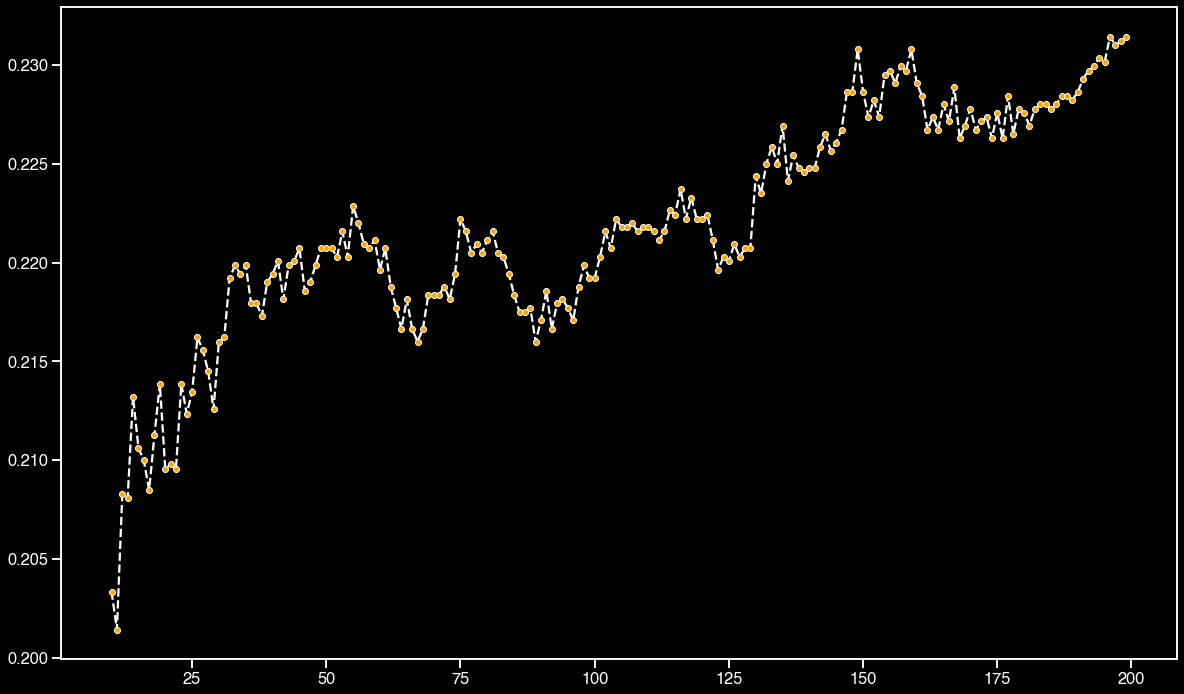

In [60]:
plt.figure(figsize=(20,12))
plt.plot(range(10,200),error_rate,color='white', linestyle='dashed',
        marker='o',markerfacecolor='orange', markersize=6)
plt.plot(range(10,200),error_rate_t,color='yellow', linestyle='dashed',
        marker='o',markerfacecolor='Orangered', markersize=6)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.legend(["Train", "Test"],fontsize=30)

print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))
   


In [57]:
acc_corse= []
acct_corse=[]
    # Will take some time\n",
from sklearn import metrics
for i in tqdm(range(50,200)):
    neigh = KNeighborsClassifier(n_neighbors = i,  metric='euclidean',n_jobs=-1).fit(X_train_scaled,y_train)
    yhat = neigh.predict(X_test_scaled)
    yhat2=neigh.predict(X_train_scaled)
    acc_corse.append(metrics.accuracy_score(y_test, yhat))
    acct_corse.append(metrics.accuracy_score(y_train, yhat2))

100%|██████████| 150/150 [16:51<00:00,  6.74s/it]


Minimum error:- 0.20141570141570142 at K = 1


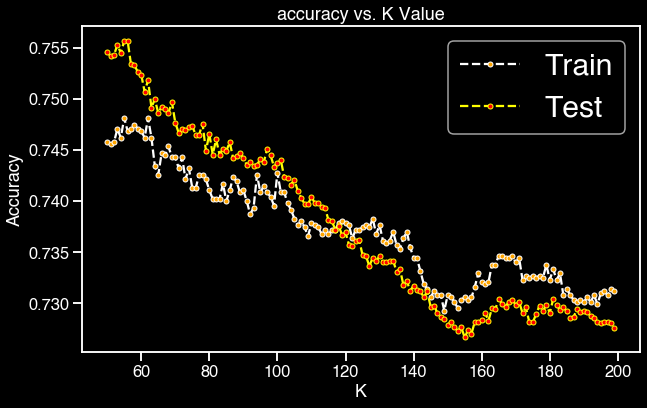

In [58]:
plt.figure(figsize=(10,6))
plt.plot(range(50,200),acc_corse,color='white', linestyle='dashed',
        marker='o',markerfacecolor='orange', markersize=5)
plt.plot(range(50,200),acct_corse,color='yellow', linestyle='dashed',
        marker='o',markerfacecolor='red', markersize=5)
plt.title("accuracy vs. K Value")
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend(["Train", "Test"],fontsize=30)
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))
   

In [26]:
acc_fine = []
acct_fine= []
    # Will take some time\n",
from sklearn import metrics
for i in tqdm(range(80,140)):
    neigh = KNeighborsClassifier(n_neighbors = i,  metric='euclidean',n_jobs=-1).fit(X_train_scaled,y_train)
    yhat = neigh.predict(X_test_scaled)
    yhat2=neigh.predict(X_train_scaled)
    acc_fine.append(metrics.accuracy_score(y_test, yhat))
    acct_fine.append(metrics.accuracy_score(y_train, yhat2))


100%|██████████| 60/60 [05:56<00:00,  5.94s/it]


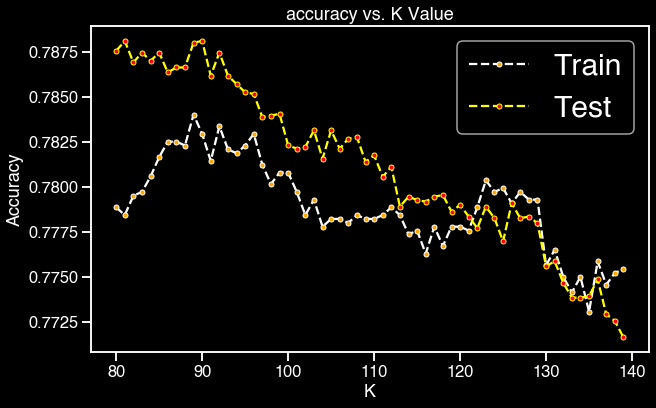

In [55]:
plt.figure(figsize=(10,6))
plt.plot(range(80,140),acc_fine,color='white', linestyle='dashed',
        marker='o',markerfacecolor='orange', markersize=5)
plt.plot(range(80,140),acct_fine,color='yellow', linestyle='dashed',
        marker='o',markerfacecolor='red', markersize=5)
plt.title("accuracy vs. K Value")
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend(["Train", "Test"],fontsize=30)

#print("(test)Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))
#print("(Train)Maximum accuracy:-",max(acct),"at K =",acct.index(max(acct)))

## Optimization of K

In [ ]:
knn_opt = KNeighborsClassifier(n_neighbors=104, metric='euclidean')
knn_opt.fit(X_train_scaled, np.ravel(y_train))

KNeighborsClassifier(metric='euclidean', n_neighbors=104)

In [ ]:
y_pred = knn_opt.predict(X_test_scaled)

In [67]:
display(y_pred.shape,
y_test.shape)

(4662,)

(4662,)

## Evaluation

In [68]:
    
# Print accuracy score \n",
print("Accuracy:", accuracy_score(y_test, y_pred).round(2))
print("Recall:", recall_score(y_test, y_pred).round(2))
print("-----"*10)
    
# Print confusion matrix\n",
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGn')

Accuracy: 0.0


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
from sklearn.metrics import roc_curve

train_probs = knn_opt.predict_proba(X_train_scaled)[:, 1]
probs = knn_opt.predict_proba(X_test_scaled)[:, 1]
    
train_predictions = knn_opt.predict(X_train_scaled)
predictions = knn_opt.predict(X_test_scaled)
    
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
    
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, probs)}')

Train ROC AUC Score: 0.8023385644512155
Test ROC AUC  Score: 0.7791237410889158


In [ ]:
print(f'Baseline ROC AUC: {roc_auc_score(y_test, [1 for _ in range(len(y_test))])}')

Baseline ROC AUC: 0.5


In [ ]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_test, train_predictions)
    train_results['precision'] = precision_score(y_test, train_predictions)
    train_results['roc'] = roc_auc_score(y_test, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');


In [ ]:
from collections import Counter
print(Counter(probs))
print(Counter(predictions))

Counter({0.14423076923076922: 172, 0.125: 149, 0.19230769230769232: 145, 0.15384615384615385: 140, 0.09615384615384616: 132, 0.04807692307692308: 129, 0.20192307692307693: 119, 0.21153846153846154: 116, 0.11538461538461539: 115, 0.019230769230769232: 112, 0.18269230769230768: 110, 0.22115384615384615: 104, 0.10576923076923077: 100, 0.1346153846153846: 100, 0.16346153846153846: 93, 0.23076923076923078: 92, 0.07692307692307693: 92, 0.3076923076923077: 91, 0.17307692307692307: 89, 0.08653846153846154: 79, 0.25: 78, 0.4423076923076923: 77, 0.038461538461538464: 76, 0.009615384615384616: 75, 0.25961538461538464: 73, 0.2403846153846154: 72, 0.0673076923076923: 70, 0.028846153846153848: 64, 0.27884615384615385: 60, 0.057692307692307696: 59, 0.2692307692307692: 57, 0.0: 55, 0.28846153846153844: 55, 0.3269230769230769: 54, 0.4326923076923077: 53, 0.2980769230769231: 53, 0.3173076923076923: 53, 0.5288461538461539: 53, 0.5: 52, 0.5384615384615384: 51, 0.33653846153846156: 50, 0.4519230769230769: 

In [ ]:
evaluate_model(predictions, probs, train_predictions, train_probs)


TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['bad' 'good'] and y_pred=[1]. Make sure that the predictions provided by the classifier coincides with the true labels.

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [1073  225    0    0    0]
 [ 153   34    0    0    0]
 [2668  509    0    0    0]]


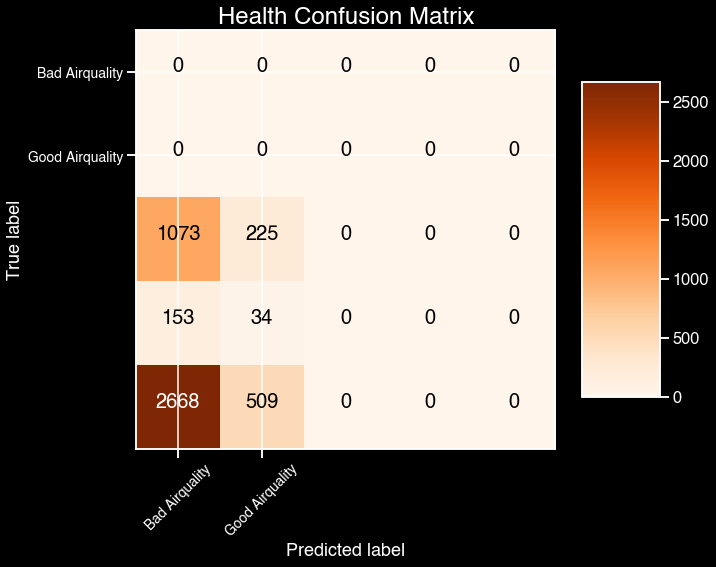

In [ ]:
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, classes = ['Bad Airquality', 'Good Airquality'],
                      title = 'Health Confusion Matrix')

In [ ]:
probs_1 =pd.DataFrame(probs, columns = ["prob"])
probs_1

,prob
0,0.451923
1,0.586538
2,0.105769
3,0.442308
4,0.250000
...,...
4657,0.798077
4658,0.105769
4659,0.192308
4660,0.586538


In [ ]:
thresh = 0.75
probs_1['Th_0.75'] = (probs_1.prob>= 0.75).astype('int')
probs_1['Th_0.25'] = (probs_1.prob >= 0.25).astype('int')
    #probs_1.drop([\"th_0.75\",\"Th-0.25\"], axis =1)

In [ ]:
probs_1

,prob,Th_0.75,Th_0.25
0,0.451923,0,1
1,0.586538,0,1
2,0.105769,0,0
3,0.442308,0,1
4,0.250000,0,1
...,...,...,...
4657,0.798077,1,1
4658,0.105769,0,0
4659,0.192308,0,0
4660,0.586538,0,1


In [ ]:
cm = confusion_matrix(y_test, probs_1['Th_0.75'])
plot_confusion_matrix(cm, classes = ['Bad Airquality', 'Good Airquality'],
                      title = 'Airquality Confusion Matrix (Threshold = 0.75')

ValueError: Mix of label input types (string and number)

In [ ]:
cm = confusion_matrix(y_test, probs_1['Th_0.25'])
plot_confusion_matrix(cm, classes = ['Bad Airquality', 'Good Airquality'],
                         title = 'Airquality Confusion Matrix (Threshold = 0.25)')

TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['bad' 'good'] and y_pred=[0 1]. Make sure that the predictions provided by the classifier coincides with the true labels.

In [ ]:
precision_score(y_test, probs_1['Th_0.75'])

TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['bad' 'good'] and y_pred=[0 1]. Make sure that the predictions provided by the classifier coincides with the true labels.

## Tri Ampel

In [28]:
data_t =data.drop(["target",'Bi_airquality', '6fold_airquality'],axis=1)

In [29]:
data_t

,location,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,min_precip,...,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press,trafic_airquality
0,2,27.208333,19.275000,22.299527,2.594011,6.728895,21.358333,7.933333,0.000,0.0,...,0.666250,1.355000,87.871667,87.614167,87.752434,0.070374,0.004952,87.762083,0.257500,yellow
1,3,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,0.561,0.0,...,0.744167,2.760833,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333,yellow
2,0,31.841667,18.458333,24.112317,3.776377,14.261020,23.304167,13.383333,7.804,0.0,...,0.942500,2.420000,88.813333,87.982500,88.420931,0.179481,0.032213,88.425000,0.830833,green
3,0,27.491667,16.941667,20.845273,3.080140,9.487259,19.541667,10.550000,25.787,0.0,...,1.388333,2.469167,88.685000,87.965000,88.376915,0.161758,0.026166,88.400000,0.720000,yellow
4,0,28.750000,17.525000,21.870732,3.286870,10.803515,20.950000,11.225000,0.136,0.0,...,0.542917,1.796667,88.719167,88.268333,88.538104,0.118369,0.014011,88.552500,0.450833,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15534,0,27.841667,16.550000,20.573209,2.987662,8.926124,19.458333,11.291667,31.842,0.0,...,0.890000,2.194167,88.730000,87.890833,88.382934,0.187366,0.035106,88.393333,0.839167,yellow
15535,4,29.550000,18.991667,23.546832,2.614979,6.838117,23.208333,10.558333,9.046,0.0,...,1.094167,2.330833,88.704167,88.082500,88.435840,0.141562,0.020040,88.450000,0.621667,green
15536,3,34.108333,16.950000,24.637083,4.352597,18.945097,24.179167,17.158333,3.893,0.0,...,0.897500,3.608333,90.885000,90.145833,90.522397,0.161257,0.026004,90.520000,0.739167,yellow
15537,3,30.900000,15.891667,23.472934,4.651403,21.635547,23.066667,15.008333,0.017,0.0,...,0.828333,2.683333,90.793333,90.106667,90.486202,0.160746,0.025839,90.512500,0.686667,yellow


In [30]:
y=data_t["trafic_airquality"]
X= data_t.drop(["trafic_airquality"], axis =1)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=RSEED)

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [34]:
col_scale = ['location', 'max_temp', 'min_temp', 'mean_temp', 'std_temp',
       'var_temp', 'median_temp', 'ptp_temp', 'max_precip', 'min_precip',
       'mean_precip', 'std_precip', 'var_precip', 'median_precip',
       'ptp_precip', 'max_rel_humidity', 'min_rel_humidity',
       'mean_rel_humidity', 'std_rel_humidity', 'var_rel_humidity',
       'median_rel_humidity', 'ptp_rel_humidity', 'max_wind_dir',
       'min_wind_dir', 'mean_wind_dir', 'std_wind_dir', 'var_wind_dir',
       'median_wind_dir', 'ptp_wind_dir', 'max_wind_spd', 'min_wind_spd',
       'mean_wind_spd', 'std_wind_spd', 'var_wind_spd', 'median_wind_spd',
       'ptp_wind_spd', 'max_atmos_press', 'min_atmos_press',
       'mean_atmos_press', 'std_atmos_press', 'var_atmos_press',
       'median_atmos_press', 'ptp_atmos_press']

In [35]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[col_scale])
X_test_scaled = scaler.transform(X_test[col_scale])

In [ ]:
print('Train data')
print('# df_train:     {}'.format(X_train_scaled.shape[0]))
print('====')
print('Test data')
print('# df_test:     {}'.format(X_test_scaled.shape[0]))

Train data
# df_train:     10877
====
Test data
# df_test:     4662


In [ ]:
y_train

3026     yellow
3794      green
2916     yellow
4387     yellow
2809     yellow
          ...  
11140    yellow
5684     yellow
9836     yellow
454      yellow
7153     yellow
Name: trafic_airquality, Length: 10877, dtype: object

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_scaled, np.ravel(y_train))

KNeighborsClassifier(metric='euclidean')

In [ ]:
y_pred = knn.predict(X_test)

## Finding best K for Tri

In [40]:
T_error_rate = []
T_error_rate_t=[]

for i in tqdm(range(10,200)):
     knn = KNeighborsClassifier(n_neighbors=i, metric="euclidean", n_jobs=-1)
     knn.fit(X_train_scaled,y_train)
     pred_i = knn.predict(X_test_scaled)
     pred_i_2=knn.predict(X_train_scaled)
     T_error_rate.append(np.mean(pred_i != y_test))
     T_error_rate_t.append(np.mean(pred_i_2 != y_train))


100%|██████████| 190/190 [18:45<00:00,  5.92s/it]


Minimum error:- 0.2471042471042471 at K = 9


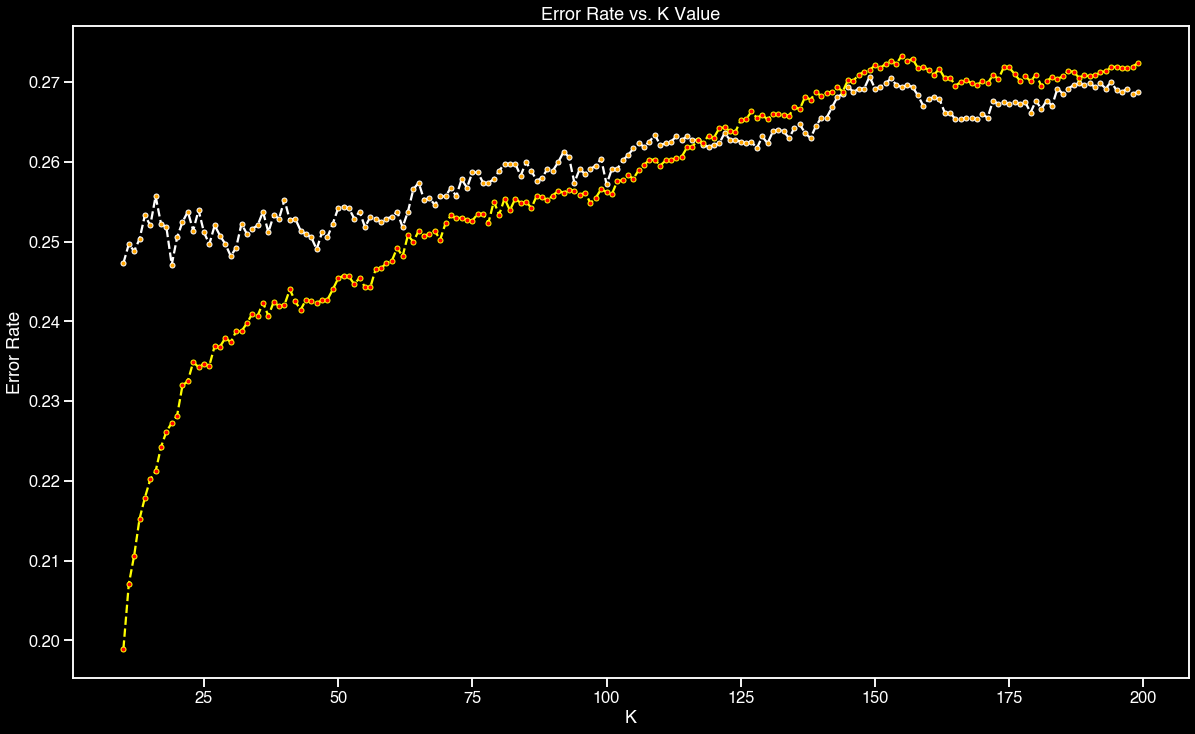

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(range(10,200),error_rate,color='white', linestyle='dashed',
        marker='o',markerfacecolor='orange', markersize=5)
plt.plot(range(10,200),error_rate_t,color='yellow', linestyle='dashed',
        marker='o',markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [41]:
T_acc_corse= []
T_acct_corse=[]
    # Will take some time\n",
from sklearn import metrics
for i in tqdm(range(75,200)):
    neigh = KNeighborsClassifier(n_neighbors = i,  metric='euclidean',n_jobs=-1).fit(X_train_scaled,y_train)
    yhat = neigh.predict(X_test_scaled)
    yhat2=neigh.predict(X_train_scaled)
    acc_corse.append(metrics.accuracy_score(y_test, yhat))
    acct_corse.append(metrics.accuracy_score(y_train, yhat2))

100%|██████████| 125/125 [12:56<00:00,  6.21s/it]


In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(75,200),T_acc_corse,color='white', linestyle='dashed',
        marker='o',markerfacecolor='orange', markersize=6)
plt.plot(range(75,200),T_acct_corse,color='yellow', linestyle='dashed',
        marker='o',markerfacecolor='red', markersize=6)
plt.title("accuracy vs. K Value")
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend(["Train", "Test"],fontsize=30)

print("(test)Maximum accuracy:-",max(T_acc_corse),"at K =",acc_corse.index(max(T_acc_corse)))
print("(Train)Maximum accuracy:-",max(T_acct_corse),"at K =",acct_corse.index(max(T_acct_corse)))
   

NameError: name 'T_acc_corse' is not defined

<Figure size 720x432 with 0 Axes>

In [42]:
T_acc_fine = []
T_acct_fine= []
    # Will take some time\n",
from sklearn import metrics
for i in tqdm(range(120,180)):
    neigh = KNeighborsClassifier(n_neighbors = i,  metric='euclidean',n_jobs=-1).fit(X_train_scaled,y_train)
    yhat = neigh.predict(X_test_scaled)
    yhat2=neigh.predict(X_train_scaled)
    T_acc_fine.append(metrics.accuracy_score(y_test, yhat))
    T_acct_fine.append(metrics.accuracy_score(y_train, yhat2))


100%|██████████| 60/60 [06:30<00:00,  6.50s/it]


(test)Maximum accuracy:- 0.7383097383097383 at K = 8
(Train)Maximum accuracy:- 0.7369679139468603 at K = 0


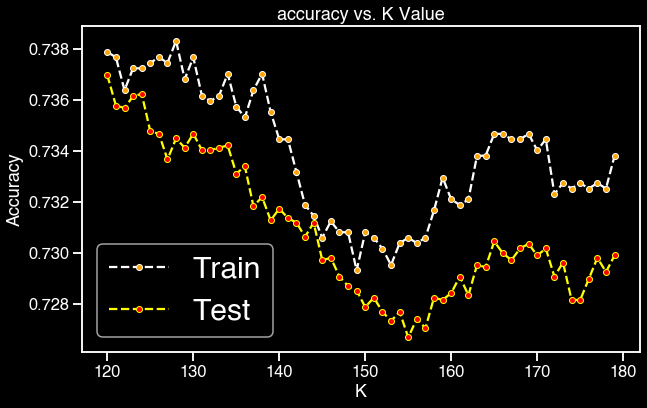

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(120,180),acc_fine,color='white', linestyle='dashed',
        marker='o',markerfacecolor='orange', markersize=6)
plt.plot(range(120,180),acct_fine,color='yellow', linestyle='dashed',
        marker='o',markerfacecolor='red', markersize=6)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend(["Train", "Test"],fontsize=30)

print("(test)Maximum accuracy:-",max(acc_fine),"at K =",acc_fine.index(max(acc_fine)))
print("(Train)Maximum accuracy:-",max(acct_fine),"at K =",acct_fine.index(max(acct_fine)))

In [ ]:
knn_t_opt = KNeighborsClassifier(n_neighbors=155, metric='euclidean')
knn_t_opt.fit(X_train_scaled, np.ravel(y_train))

KNeighborsClassifier(metric='euclidean', n_neighbors=155)

In [ ]:
# Predict on test set
y_pred = knn_t_opt.predict(X_test)

# Print accuracy score 
print("Accuracy:", accuracy_score(y_test, y_pred).round(2))
print("Recall:", recall_score(y_test, y_pred).round(2))
print("-----"*10)

# Print confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGn');

Accuracy: 0.68


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].